PyDAP

In [4]:
from pydap.client import open_url

pdpData = open_url('http://test.opendap.org/dap/data/nc/coads_climatology.nc')

#coads_climatology.nc

In [5]:
type(pdpData)

pydap.model.DatasetType

In [6]:
pdpData.keys

<bound method Mapping.keys of <DatasetType with children 'COADSX', 'COADSY', 'TIME', 'SST', 'AIRT', 'UWND', 'VWND'>>

In [7]:
pdpData['SST'].data

[BaseProxy('http://test.opendap.org/dap/data/nc/coads_climatology.nc', 'SST.SST', dtype('>f4'), (12, 90, 180), (slice(None, None, None), slice(None, None, None), slice(None, None, None))),
 BaseProxy('http://test.opendap.org/dap/data/nc/coads_climatology.nc', 'SST.TIME', dtype('>f8'), (12,), (slice(None, None, None),)),
 BaseProxy('http://test.opendap.org/dap/data/nc/coads_climatology.nc', 'SST.COADSY', dtype('>f8'), (90,), (slice(None, None, None),)),
 BaseProxy('http://test.opendap.org/dap/data/nc/coads_climatology.nc', 'SST.COADSX', dtype('>f8'), (180,), (slice(None, None, None),))]

In [8]:
sst = pdpData['SST']
sst.TIME

<BaseType with data BaseProxy('http://test.opendap.org/dap/data/nc/coads_climatology.nc', 'SST.TIME', dtype('>f8'), (12,), (slice(None, None, None),))>

In [9]:
pdpData['VWND'].attributes

{'missing_value': -9.99999979e+33,
 '_FillValue': -9.99999979e+33,
 'long_name': 'MERIDIONAL WIND',
 'history': 'From coads_climatology',
 'units': 'M/S'}

In [10]:
sst.shape

(12, 90, 180)

In [11]:
grid = sst[0, 10:14, 10:14]

In [12]:
grid.data

[array([[[-1.2628571e+00, -9.9999998e+33, -9.9999998e+33, -9.9999998e+33],
         [-7.6916665e-01, -7.7999997e-01, -6.7545450e-01, -5.9571427e-01],
         [ 1.2833333e-01, -5.0000016e-02, -6.3636363e-02, -1.4166667e-01],
         [ 6.3800001e-01,  8.9538461e-01,  7.2166663e-01,  8.1000000e-01]]],
       dtype=float32),
 array([366.]),
 array([-69., -67., -65., -63.]),
 array([41., 43., 45., 47.])]

In [13]:
sst_grid = sst[0, 10:14, 10:14].array[:].data
time_data = time[0].data

NameError: name 'time' is not defined

In [ ]:
time = pdpData['TIME']
time_data = time[0].data

In [14]:
type(time_data), time_data

NameError: name 'time_data' is not defined

In [15]:
X = pdpData['COADSX']
Y = pdpData['COADSY']

X_data = X[10:14].data
Y_data = Y[10:14].data

In [16]:
type(X_data), type(Y_data), X_data, Y_data

(numpy.ndarray,
 numpy.ndarray,
 array([41., 43., 45., 47.]),
 array([-69., -67., -65., -63.]))

In [17]:
from pydap.client import open_url
from pydap.cas.urs import setup_session # needed for Earthdata login
import numpy as np

url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4'

username = 'denise_burgett'  # please replace with your own username
password = 'Lollypop3'  # please replace with your own password
session = setup_session(username, password, check_url=url) # create Earthdata session
dataset = open_url(url, session=session)

In [18]:
dataset.keys()

KeysView(<DatasetType with children 'lat', 'lon', 'time', 'time_bnds', 'Swnet_tavg', 'Lwnet_tavg', 'Qle_tavg', 'Qh_tavg', 'Qg_tavg', 'Snowf_tavg', 'Rainf_tavg', 'Evap_tavg', 'Qs_acc', 'Qsb_acc', 'Qsm_acc', 'SnowT_tavg', 'AvgSurfT_inst', 'Albedo_inst', 'SWE_inst', 'SnowDepth_inst', 'SoilMoist_S_inst', 'SoilMoist_RZ_inst', 'SoilMoist_P_inst', 'SoilTMP0_10cm_inst', 'SoilTMP10_29cm_inst', 'SoilTMP29_68cm_inst', 'SoilTMP68_144cm_inst', 'SoilTMP144_295cm_inst', 'SoilTMP295_1295cm_inst', 'ECanop_tavg', 'TVeg_tavg', 'ESoil_tavg', 'CanopInt_inst', 'ACond_tavg', 'TWS_inst', 'Wind_f_inst', 'Rainf_f_tavg', 'Tair_f_inst', 'Qair_f_inst', 'Psurf_f_inst', 'SWdown_f_tavg', 'LWdown_f_tavg'>)

In [19]:
dataset.attributes

{'NC_GLOBAL': {'missing_value': -9999.0,
  'tavg%20definition:': 'past 3-hour average',
  'acc%20definition:': 'past 3-hour accumulation',
  'inst%20definition:': 'instantaneous',
  'title': 'GLDAS2.1 LIS land surface model output monthly mean',
  'institution': 'NASA GSFC',
  'source': 'CLSM_F2.5 forced with GDAS-AGRMET-GPCPv13rA1_202101',
  'history': 'created on date: 2021-04-24T00:32:02.945',
  'references': 'Rodell_etal_BAMS_2004, Kumar_etal_EMS_2006, Peters-Lidard_etal_ISSE_2007',
  'conventions': 'CF-1.6',
  'comment': 'website: https://ldas.gsfc.nasa.gov/gldas, https://lis.gsfc.nasa.gov/',
  'MAP_PROJECTION': 'EQUIDISTANT CYLINDRICAL',
  'SOUTH_WEST_CORNER_LAT': -59.5,
  'SOUTH_WEST_CORNER_LON': -179.5,
  'DX': 1.0,
  'DY': 1.0},
 'DODS_EXTRA': {'Unlimited_Dimension': 'time'}}

In [20]:
dataset.Rainf_tavg.attributes

{'units': 'kg m-2 s-1',
 'standard_name': 'rainfall_flux',
 'long_name': 'Rain precipitation rate',
 'cell_methods': 'time: mean',
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'missing_value': -9999.0,
 '_FillValue': -9999.0,
 'vmin': 0.0,
 'vmax': 0.000195646906}

In [21]:
dataset.Rainf_tavg.shape

(1, 150, 360)

In [22]:
dataset.time.data[:]
dataset.time[:].units

HTTPError: 302 Found
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>302 Found</title>
</head><body>
<h1>Found</h1>
<p>The document has moved <a href="https://urs.earthdata.nasa.gov/oauth/authorize/?scope=uid&amp;app_type=401&amp;client_id=e2WVk8Pw6weeLUKZYOxvTQ&amp;response_type=code&amp;redirect_uri=http%3A%2F%2Fhydro1.gesdisc.eosdis.nasa.gov%2Fdata-redirect&amp;state=aHR0cHM6Ly9oeWRybzEuZ2VzZGlzYy5lb3NkaXMubmFzYS5nb3Yvb3BlbmRhcC9oeXJheC9HTERBUy9HTERBU19DTFNNMTBfTS4yLjEvMjAyMS9HTERBU19DTFNNMTBfTS5BMjAyMTAxLjAyMS5uYzQuZG9kcz90aW1lJTVCMDoxOjAlNUQ">here</a>.</p>
</body></html>

This is redirect error. These should not usually raise an error in pydap beacuse redirects are handled implicitly. If it failed it is likely due to a circular redirect.

In [ ]:
rainf = dataset.Rainf_tavg.array[:].data
lon = dataset.lon[:].data
lat =  dataset.lat[:].data
lonGrid, latGrid = np.meshgrid(lon,lat)
fillVal = dataset.Rainf_tavg.missing_value

In [69]:
# replace missing values with nan
rainf[rainf==fillVal] = np.nan
# convert unit from kg m-2 s-1 to kg m-2 d-1
rainf_day = rainf*60*60*24

NameError: name 'rainf' is not defined

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.pcolormesh(lonGrid,latGrid, rainf_day[0], shading='auto',cmap='nipy_spectral') 
# or use: 
#plt.scatter(lonGrid,latGrid, c=rainf_day, cmap='nipy_spectral', s=1) 
plt.colorbar(label='GLDAS average daily Rainfall in Jan 2021(mm)')

NameError: name 'lonGrid' is not defined

<Figure size 1000x600 with 0 Axes>

In [24]:
###Shapley

import shapely
from shapely.geometry import Point, Polygon

In [25]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

In [26]:
point1.x, point1.y

(2.2, 4.2)

In [27]:
point1.distance(point2)

29.723559679150142

In [28]:
poly = Polygon([(2.2, 4.2),(7.2, -25.1),(9.26, -2.456)])

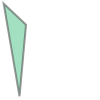

In [29]:
poly 

In [30]:
poly.bounds

(2.2, -25.1, 9.26, 4.2)

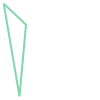

In [31]:
poly.exterior

In [32]:
point4 = Point(5, 0)
point5 = Point(-1, -30)

In [33]:
point4.within(poly), point5.within(poly)

(True, False)

In [34]:
poly.contains(point4), poly.contains(point5)

(True, False)

In [35]:
# Read Atlantic coordinates
import numpy as np
filename = "../geosf22_burgettd/USA_mainland.csv" 
areabnd = np.genfromtxt(filename, delimiter=',', skip_header=1) 
areabnd

array([[-97.21569824,  25.97013855],
       [-97.20180511,  25.97624969],
       [-97.20097351,  25.96736145],
       ...,
       [-97.18486023,  26.04680634],
       [-97.22736359,  25.99680519],
       [-97.21569824,  25.97013855]])

In [36]:
# Convert all coordinate pairs tp a list of tuples
# (shapely polygon expects list of coordinate tuple pairs)
arealist = []
for i in range(len(areabnd)):
     arealist.append(tuple([areabnd[i,1], areabnd[i,0]]))

In [37]:
# transforming the AtlanticList to a shapely polygon
from shapely.geometry import Point, Polygon
areaPoly = Polygon(arealist)

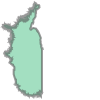

In [38]:
# Get min/max coordinates of the polygon = bounds / bounding box
areaPoly.bounds
areaPoly

In [39]:
from pydap.client import open_url       # needed for OPeNDAP access
from pydap.cas.urs import setup_session # needed for Earthdata login
import numpy as np

url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4'
username = '...'      # please replace with your own username
password = '...'  # please replace with your own password
session = setup_session(username, password, check_url=url) # create Earthdata session
dataset = open_url(url, session=session)  # create connection to dataset

rainf = dataset.Rainf_tavg.array[:].data
lon = dataset.lon[:].data
lat =  dataset.lat[:].data
lonGrid, latGrid = np.meshgrid(lon,lat)
fillVal = dataset.Rainf_tavg.missing_value
# replace missing values with nan
rainf[rainf==fillVal] = np.nan
# convert unit from kg m-2 s-1 to kg m-2 d-1
rainf_day = rainf*60*60*24

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
plt.pcolormesh(lonGrid,latGrid, rainf_day[0], shading='auto',cmap='nipy_spectral') 
plt.colorbar(label='GLDAS average daily Rainfall in Jan 2021(mm)')
plt.xlim(-130, -70)
plt.ylim(25, 60)
plt.plot(areabnd[:,0],areabnd[:,1],'r')

HTTPError: 302 Found
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>302 Found</title>
</head><body>
<h1>Found</h1>
<p>The document has moved <a href="https://urs.earthdata.nasa.gov/oauth/authorize/?scope=uid&amp;app_type=401&amp;client_id=e2WVk8Pw6weeLUKZYOxvTQ&amp;response_type=code&amp;redirect_uri=http%3A%2F%2Fhydro1.gesdisc.eosdis.nasa.gov%2Fdata-redirect&amp;state=aHR0cHM6Ly9oeWRybzEuZ2VzZGlzYy5lb3NkaXMubmFzYS5nb3Yvb3BlbmRhcC9oeXJheC9HTERBUy9HTERBU19DTFNNMTBfTS4yLjEvMjAyMS9HTERBU19DTFNNMTBfTS5BMjAyMTAxLjAyMS5uYzQuZG9kcz9SYWluZl90YXZnLlJhaW5mX3RhdmclNUIwOjE6MCU1RCU1QjA6MToxNDklNUQlNUIwOjE6MzU5JTVE">here</a>.</p>
</body></html>

This is redirect error. These should not usually raise an error in pydap beacuse redirects are handled implicitly. If it failed it is likely due to a circular redirect.

In [40]:
# get bounds of the polygon
areaPoly.bounds

# Slice big grid to subset to reduce processing effort
# (the bounding box of the polygon is sufficient)
# (here this is set manually)
lonGrid_sub = lonGrid[80:120,50:120]
latGrid_sub = latGrid[80:120,50:120]
rainf_day_sub = rainf_day[0,80:120,50:120]
rainf_day_sub.shape

# Get length of coordinate dimensions
latNum , lonNum = rainf_day_sub.shape

# Generate a mask for the subset
polyMask = np.zeros(rainf_day_sub.shape)
# iterate through longitude array
for lo_i in range(0,lonNum):
    # iterate through latitude array
    for la_i in range(0,latNum):
        # set current lon/lat
        lo = lonGrid_sub[la_i,lo_i]  # cur lon coord
        la = latGrid_sub[la_i,lo_i]  # cur lat coord
        # create current point
        currentPoint = Point(la,lo)
        # check if point inside: returns true or false
        check = currentPoint.within(areaPoly)
        polyMask[la_i,lo_i] = int(check)

# plotting the mask & the boundary
plt.pcolormesh(lonGrid_sub,latGrid_sub, polyMask,shading='auto')
plt.plot(areabnd[:,0], areabnd[:,1], 'r--')
cbar = plt.colorbar()
cbar.set_label('Mask function for the USA')

# convert mask from 0/1 to true/false
polyMask_bool = np.copy(polyMask)
polyMask_bool = polyMask_bool.astype(dtype=bool) 


NameError: name 'lonGrid' is not defined

In [41]:
# Use masking to retrieve only grid cells inside the polygon and estimate mean for them
meanAveDailyRainfall_USA = np.nanmean(rainf_day_sub[polyMask_bool])
meanAveDailyRainfall_USA


### SUPPLEMENT FOR PART 5

# Note: Vectorize this also for a time series of data grids
# First: generate syntetic time series
rainf_day_sub_TS = np.array([rainf_day_sub,rainf_day_sub*2.5,rainf_day_sub*2.8,
                             rainf_day_sub*1.5,rainf_day_sub*0.8,rainf_day_sub*1.2])
rainf_day_sub_TS.shape

# Now we can use the mask to filter out grid cells outside the region
# then we apply nanmean only for second axes 
# Note: after mask-filtering the spatial axes are merged to one
usa_TS = np.nanmean(rainf_day_sub_TS[:,polyMask_bool],axis=1)

#Plot the results
plt.rcParams['figure.figsize'] = [6, 3]   
plt.plot(usa_TS)
plt.title('Synthetic time series of average daily rainfall over the US')
plt.show()

NameError: name 'rainf_day_sub' is not defined